In [ ]:
import os
import json
import pandas as pd
from urllib.request import urlopen

import random
import numpy as np
from tqdm import tqdm_notebook as tqdm
from collections import defaultdict

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# load all data
data1 = []
with open('/content/drive/MyDrive/Colab Notebooks/project_datafiles/Sports_and_Outdoors_5.json', 'r') as f:
    for l in tqdm(f):
        data1.append(json.loads(l))

<ipython-input-4-349cae4c91a7>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for l in tqdm(f):


0it [00:00, ?it/s]

In [ ]:
#convert list into dataframe 
df1 = pd.DataFrame(data1)

df1.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AIXZKN4ACSKI,1881509818,David Briner,"[0, 0]",This came in on time and I am veru happy with ...,5.0,Woks very good,1390694400,"01 26, 2014"
1,A1L5P841VIO02V,1881509818,Jason A. Kramer,"[1, 1]",I had a factory Glock tool that I was using fo...,5.0,Works as well as the factory tool,1328140800,"02 2, 2012"
2,AB2W04NI4OEAD,1881509818,J. Fernald,"[2, 2]",If you don't have a 3/32 punch or would like t...,4.0,"It's a punch, that's all.",1330387200,"02 28, 2012"
3,A148SVSWKTJKU6,1881509818,"Jusitn A. Watts ""Maverick9614""","[0, 0]",This works no better than any 3/32 punch you w...,4.0,It's a punch with a Glock logo.,1328400000,"02 5, 2012"
4,AAAWJ6LW9WMOO,1881509818,Material Man,"[0, 0]",I purchased this thinking maybe I need a speci...,4.0,"Ok,tool does what a regular punch does.",1366675200,"04 23, 2013"


In [ ]:
#add new column
df1["Category"] ="Sports & Outdoors"

In [ ]:
# load all data
data2 = []
with open('/content/drive/MyDrive/Colab Notebooks/project_datafiles/Health_and_Personal_Care_5.json', 'r') as f:
    for i in tqdm(f):
        data2.append(json.loads(i))

<ipython-input-7-cd6a8c5aea68>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(f):


0it [00:00, ?it/s]

In [ ]:
#convert list into dataframe 
df2 = pd.DataFrame(data2)

df2.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,ALC5GH8CAMAI7,159985130X,AnnN,"[1, 1]",This is a great little gadget to have around. ...,5.0,Handy little gadget,1294185600,"01 5, 2011"
1,AHKSURW85PJUE,159985130X,"AZ buyer ""AZ buyer""","[1, 1]",I would recommend this for a travel magnifier ...,4.0,Small & may need to encourage battery,1329523200,"02 18, 2012"
2,A38RMU1Y5TDP9,159985130X,"Bob Tobias ""Robert Tobias""","[75, 77]",What I liked was the quality of the lens and t...,4.0,Very good but not great,1275955200,"06 8, 2010"
3,A1XZUG7DFXXOS4,159985130X,Cat lover,"[56, 60]",Love the Great point light pocket magnifier! ...,4.0,great addition to your purse,1202428800,"02 8, 2008"
4,A1MS3M7M7AM13X,159985130X,Cricketoes,"[1, 1]",This is very nice. You pull out on the magnifi...,5.0,Very nice and convenient.,1313452800,"08 16, 2011"


In [ ]:
df2["Category"] ="Health & Personal Care"

In [ ]:
final_df = pd.concat([df1,df2], axis = 0)
final_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,Category
0,AIXZKN4ACSKI,1881509818,David Briner,"[0, 0]",This came in on time and I am veru happy with ...,5.0,Woks very good,1390694400,"01 26, 2014",Sports & Outdoors
1,A1L5P841VIO02V,1881509818,Jason A. Kramer,"[1, 1]",I had a factory Glock tool that I was using fo...,5.0,Works as well as the factory tool,1328140800,"02 2, 2012",Sports & Outdoors
2,AB2W04NI4OEAD,1881509818,J. Fernald,"[2, 2]",If you don't have a 3/32 punch or would like t...,4.0,"It's a punch, that's all.",1330387200,"02 28, 2012",Sports & Outdoors
3,A148SVSWKTJKU6,1881509818,"Jusitn A. Watts ""Maverick9614""","[0, 0]",This works no better than any 3/32 punch you w...,4.0,It's a punch with a Glock logo.,1328400000,"02 5, 2012",Sports & Outdoors
4,AAAWJ6LW9WMOO,1881509818,Material Man,"[0, 0]",I purchased this thinking maybe I need a speci...,4.0,"Ok,tool does what a regular punch does.",1366675200,"04 23, 2013",Sports & Outdoors


In [ ]:
final_data = final_df.sample(frac=0.4, random_state= 42)

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
import re
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))


In [ ]:
def clean(text):
    text = str(text).lower()
    text = re.sub('[.*?]', '', text)
    text = re.sub('https?://S+|www.S+', '', text)
    text = re.sub('n', '', text)
    text = re.sub('w*dw*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
final_data["reviewText"] = final_data["reviewText"].apply(clean)

In [ ]:
import matplotlib as plt
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 28.0 MB/s 


In [ ]:
ratings = final_df["overall"].value_counts()
numbers = ratings.index
quantity = ratings.values

In [ ]:
import plotly.express as px

In [ ]:
figure = px.pie(final_df, values=quantity, names=numbers,hole = 0.5)
figure.show()

In [ ]:
import seaborn as sns
from wordcloud import WordCloud 

In [ ]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
from nltk.sentiment import SentimentAnalyzer
sentiments = SentimentIntensityAnalyzer()
final_data["Pos"] = [sentiments.polarity_scores(i)["pos"] for i in final_data["reviewText"]]
final_data["Neg"] = [sentiments.polarity_scores(i)["neg"] for i in final_data["reviewText"]]
final_data["Neu"] = [sentiments.polarity_scores(i)["neu"] for i in final_data["reviewText"]]
final_data["compound"] = [sentiments.polarity_scores(i)["compound"] for i in final_data["reviewText"]]
data = final_data[["reviewText", "Pos", "Neg", "Neu", "compound"]]
data.head()

,reviewText,Pos,Neg,Neu,compound
47021,chage tire 1200 mile cotiet harshel gatorski ...,0.000,0.000,1.000,0.0000
273341,"i'v bee usig prouct sever year ow couter oly,...",0.149,0.000,0.851,0.6369
227768,o't give prouct 5 star ratig o't use featur me...,0.000,0.128,0.872,-0.2960
194040,favourit wash eve husba uless make tropic trai...,0.000,0.000,1.000,0.0000
159231,"eoorat smell ice whe first applie, time goe sc...",0.088,0.000,0.912,0.8478


In [ ]:
final_data

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,Category,Pos,Neg,Neu,compound,sentiment
47021,A1LZ63OMHD6YNK,B000HDNCHI,Old Man River,"[1, 1]",chage tire 1200 mile cotiet harshel gatorski ...,5.0,These Are Good Tires,1378944000,"09 12, 2013",Sports & Outdoors,0.000,0.000,1.000,0.0000,Neutral
273341,A3KVXLRJ2O6RAS,B007D4R4ZK,Old Broad,"[0, 0]","i'v bee usig prouct sever year ow couter oly,...",5.0,Price,1366329600,"04 19, 2013",Health & Personal Care,0.149,0.000,0.851,0.6369,Satisfied
227768,A3NGLZL8GFGZOE,B004H468S8,Brian,"[0, 0]",o't give prouct 5 star ratig o't use featur me...,4.0,Omron BP760 7 Blood Pressure Monitor,1343001600,"07 23, 2012",Health & Personal Care,0.000,0.128,0.872,-0.2960,Neutral
194040,A2RHFO4FX45UVU,B0038QQ7TG,teambarrett14,"[0, 0]",favourit wash eve husba uless make tropic trai...,5.0,the best! besides homemade,1325721600,"01 5, 2012",Health & Personal Care,0.000,0.000,1.000,0.0000,Neutral
159231,A2VH0UT5EQFB6P,B0028K3IZY,Loveguitar,"[0, 0]","eoorat smell ice whe first applie, time goe sc...",3.0,Very Strong Scent,1243468800,"05 28, 2009",Health & Personal Care,0.088,0.000,0.912,0.8478,Very Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167801,A3B1IKBYRM39Y6,B002HHREU8,"C. A. Wirfs ""Buyer Extraordinaire""","[0, 0]",bought whey protei boy fortress price reasoabl...,4.0,I like the purpose of the whey protein better ...,1378339200,"09 5, 2013",Health & Personal Care,0.093,0.000,0.907,0.5267,Satisfied
127533,A35WZEJPCUIY5A,B001IPKL7I,Amazon Customer,"[1, 1]",ae kife collectio toay use bk11 becker ecker s...,5.0,I Like It,1326153600,"01 10, 2012",Sports & Outdoors,0.103,0.000,0.897,0.7579,Satisfied
121102,AL0A38B1RJ2FQ,B001FB5CS8,ridemaster-v,"[0, 0]","ice optics, har soft cases, goo tripo overall,...",5.0,Great Package,1362009600,"02 28, 2013",Sports & Outdoors,0.358,0.000,0.642,0.9393,Very Satisfied
165278,A2M86CIJH04BN1,B002QZ1RS6,AWM,"[1, 1]","i'm oli ito fourth week program, ca't believ i...",5.0,awesome program,1354233600,"11 30, 2012",Sports & Outdoors,0.062,0.000,0.938,0.6369,Satisfied


In [ ]:
final_data.loc[final_data["compound"]>.6,"sentiment"]="Very Satisfied"
final_data.loc[(final_data["compound"]<=.6)&(final_data["compound"]>.2),"sentiment"]="Satisfied"
final_data.loc[(final_data["compound"]<=.2)&(final_data["compound"]>-.2),"sentiment"]="Neutral"
final_data.loc[(final_data["compound"]<=-.2)&(final_data["compound"]>-.6),"sentiment"]="Dissatisfied"
final_data.loc[final_data["compound"]<=-.6,"sentiment"]="Very Dissatisfied"

In [ ]:
final_data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,Category,Pos,Neg,Neu,compound,sentiment
47021,A1LZ63OMHD6YNK,B000HDNCHI,Old Man River,"[1, 1]",chage tire 1200 mile cotiet harshel gatorski ...,5.0,These Are Good Tires,1378944000,"09 12, 2013",Sports & Outdoors,0.000,0.000,1.000,0.0000,Neutral
273341,A3KVXLRJ2O6RAS,B007D4R4ZK,Old Broad,"[0, 0]","i'v bee usig prouct sever year ow couter oly,...",5.0,Price,1366329600,"04 19, 2013",Health & Personal Care,0.149,0.000,0.851,0.6369,Very Satisfied
227768,A3NGLZL8GFGZOE,B004H468S8,Brian,"[0, 0]",o't give prouct 5 star ratig o't use featur me...,4.0,Omron BP760 7 Blood Pressure Monitor,1343001600,"07 23, 2012",Health & Personal Care,0.000,0.128,0.872,-0.2960,Dissatisfied
194040,A2RHFO4FX45UVU,B0038QQ7TG,teambarrett14,"[0, 0]",favourit wash eve husba uless make tropic trai...,5.0,the best! besides homemade,1325721600,"01 5, 2012",Health & Personal Care,0.000,0.000,1.000,0.0000,Neutral
159231,A2VH0UT5EQFB6P,B0028K3IZY,Loveguitar,"[0, 0]","eoorat smell ice whe first applie, time goe sc...",3.0,Very Strong Scent,1243468800,"05 28, 2009",Health & Personal Care,0.088,0.000,0.912,0.8478,Very Satisfied


In [ ]:
final_data.to_csv("/content/drive/MyDrive/Colab Notebooks/project_datafiles/final_data1.csv")

**WordCloud**

In [ ]:
from wordcloud import WordCloud

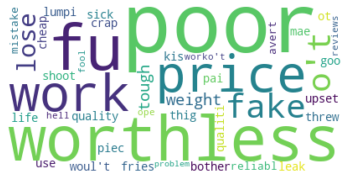

In [ ]:
import matplotlib.pyplot as plt
temp=final_data[final_data["Neg"]>.6]
#Creating the text variable

text2 = " ".join(review for review in temp.reviewText)

# Creating word_cloud with text as argument in .generate() method

word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

# Display the generated Word Cloud

plt.imshow(word_cloud2, interpolation='bilinear')

plt.axis("off")

plt.show()

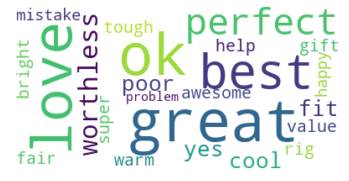

In [ ]:
temp=final_data[final_data["Neu"]==0]
#Creating the text variable

text1 = " ".join(review for review in temp.reviewText)

# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text1)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

plt.show()

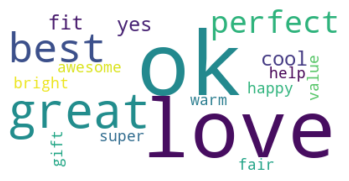

In [ ]:
temp=final_data[final_data["Pos"]>=1]
#Creating the text variable

text1 = " ".join(review for review in temp.reviewText)

# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text1)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

plt.show()